In [1]:
# Importing libraries
%matplotlib notebook
from IPython.core.interactiveshell import InteractiveShell
import pandas as pd 
import math
import matplotlib.pyplot as plt
import numpy as np
import array
InteractiveShell.ast_node_interactivity = "all"

# Analisi delle prestazioni degli algoritmi di ordinamento basati su confronti

## Introduzione
Il seguente elaborato è volto all'implementazione e all'analisi della complessità temporale dei principali algoritmi di ordinamento basati su confronti.
Nello specifico, sono stati scelti i seguenti algoritmi:
* **Insertion Sort**
* **Merge Sort**
* **Heap Sort**
* **Quick Sort**

## Specifiche tecniche
I test sono stati condotti su una macchina con le seguenti caratteristiche:
* **Sistema operativo**: Windows 10 Home 64bit
* **CPU**: Intel(R) Core(TM) i7-6500  @2.50GHz x64
* **RAM**: 12 GB

## Approccio utilizzato
L'elaborato prevede, per ciascuno degli algoritmi analizzati, i seguenti step:
1. **Analisi delle prestazioni dell'algoritmo**: comprende una analisi asintotica del tempo di esecuzione dell'algoritmo.

2. **Implementazione dell'algoritmo**: comprende l'implementazione dell'algoritmo in un specifico linguaggio di programmazione. In particolare, si è scelto di sviluppare gli algoritmi di interesse nel linguaggio di programmazione *C*. Tale linguaggio è un linguaggio procedurale, strettamente tipizzato e compilato. Supporta inoltre la ricorsione ed è in grado di offrire un elevato livello di ottimizzazione del codice sviluppato. Al fine di ottenere le migliori prestazioni possibili, si è scelto di utilizzare l'opzione di compilazione _-O3_ offerta dal compilatore _gcc_.
    L'algoritmo di ordinamento viene eseguito un numero di volte prestabilito su array di dimensione incrementale:
    
    * Per ogni singola esecuzione, l'array di input dell'algoritmo viene rigenerato. 
    * Per ogni valore di dimensione, vengono registrati i tempi di esecuzione dell'algoritmo e ne viene calcolata la **mediana**. 
    
   Oltre all'algoritmo, è stato sviluppato il codice che consente, all'esecuzione del programma, di scegliere la dimensione massima dell'array da ordinare, l'incremento di dimensione fra una esecuzione e la successiva, ed il numero di ripetizioni per ciascun valore di dimensione. Tali informazioni vengono acquisite da tastiera. Al termine dell'esecuzione, è prodotto un file testuale conforme al formato **csv**, nel quale sono riportate due colonne rappresentanti il numero di elementi sul quale è stato eseguito l'algoritmo e la mediana dei tempi di esecuzione. I tempi di esecuzione ottenuti comprendono l'intero intervallo temporale trascorso a partire dall'esecizione dell'algoritmo fino alla sua terminazione. Windows, infatti, non consente di ottenere il tempo di CPU necessario all'algoritmo per essere eseguito.
   
3. **Esecuzione dell'algoritmo**: comprende l'esecuzione dell'algoritmo. In particolare, si è scelto di eseguire gli algoritmi nel caso medio usando un array di elementi casuali, riempito tramite la funzione **rand()** della libreria *stdlib*. I valori generati variano nell'intervallo **\[0..99\]**. Né gli standard C né le specifiche POSIX definiscono una distribuzione per rand(). Tuttavia è abbastanza sicuro supporre che rand() produca valori casuali con distribuzione uniforme nell'intervallo specificato.In alcuni casi, per effettuare un confronto fra l'esecuzione nel caso medio e nel caso peggiore o migliore, sono stati utilizzati array già ordinati.

4. **Visualizzazione dei risultati sperimentali**: comprende l'estrazione delle informazioni sui tempi d'esecuzione dell'algoritmo dal report generato e la visualizzazione delle stesse tramite grafici. Tale processo è stato adempito utilizzando il linguaggio di programmazione **Python** e librerie per l'analisi dei dati, quale **pandas** e **numpy** . I risultati sperimentali vengono confrontati con i risultati attesi teoricamente. Vengono quindi effettuate opportune osservazioni laddove necessario.

## Insertion Sort
Di seguito è riportata l'analisi dell'algoritmo Insertion Sort.

### Analisi delle prestazioni

#### Pseudocodice
>```Python
    Insertion_Sort(A)
1       for i=2 to A.length
2       key = A[i]
3       j=i-1
4       while j>0 and A[j]>A[i]
5           A[j+1] = A[j]
6           j=j-1
7       A[j+1] = key```

#### Complessità temporale
Assegnando alla linea $i$ il costo costante $c_i$ ed indicando con $t_i$ il numero di esecuzioni del test del ciclo while è possibile scrivere:

$T(n) = c_1n + (c_2 + c_3 + c_7)(n-1) + c_4\sum_{i=2}^{n} t_i +(c_5 + c_6)\sum_{i=2}^{n} (t_i-1)$

Nel **caso migliore**, ovvero nel caso di array ordinato in maniera crescente possiamo scrivere l'espressione di $T(n)$ come segue:

$T(n) = c_1 n + (c_2 + c_3 + c_7)(n-1) + c_4\sum_{i=2}^{n} 1 = $

$= c_1 n + (c_2 + c_3 + c_7)(n-1) + c_4(n-1) = $

$= c_1 n + (c_2 + c_3 + c_4 + c_7)(n-1) = $

$= (c_1 + c_2 + c_3 + c_4 + c_7)n - (c_2 + c_3 + c_4 + c_7) = $

$= an + b $

Si ottiene dunque un **tasso di crescita** lineare per insertion sort nel caso migliore.

Nel **caso peggiore**, ovvero nel caso di array ordinato in maniera decrescente possiamo scrivere l'espressione di $T(n)$ come segue:

$T(n) = c_1 n + (c_2 + c_3 + c_7)(n-1) + c_4\sum_{i=2}^{n} i + (c_5 + c_6)\sum_{i=2}^{n} (i-1)= $

$= c_1 n + (c_2 + c_3 + c_7)(n-1) + c_4\sum_{i=1}^{n} i - c_4 + (c_5 + c_6)\sum_{i=1}^{n-1} i= $

$= c_1 n + (c_2 + c_3 + c_7)(n-1) + c_4 \frac{n(n+1)}{2} - c_4 + (c_5 + c_6)\frac{(n-1)n}{2} = $

$= (c_1 + c_2 + c_3 + c_7)n - (c_2 + c_3 + c_7) + \frac{c_4}{2} (n^2 + n) - c_4 + (c_5 + c_6)\frac{n^2 - n}{2} = $

$=\frac{c_4 + c_5 + c_6}{2}n^2 + (c_1 + c_2 + c_3 + c_7 + \frac{c_4}{2} - \frac{c_5}{2} - \frac{c_6}{2})n - (c_2 + c_3 + c_4 + c_7)= $

$= an^2 + bn + c $

Si ottiene dunque un **tasso di crescita** quadratico per insertion sort nel caso peggiore.

Nel **caso medio**, ovvero nel caso di array generato in maniera casuale in cui gli elementi hanno una distribuzione uniforme nell'intervallo di esistenza, si hanno circa $\frac{i}{2}$ elementi più grandi di $A[i]$. Pertanto, possiamo considerare $t_i = \frac{i}{2}$. Sostituendo nell'espressione di $T(n)$ tale valore è banale osservare che variano soltanto i coefficienti $c_i$ ma il tasso di crescita del tempo di esecuzione rimane invariato.

La complessità temporale nel caso peggiore è pertanto $\theta(n^2)$.

È possibile dimostrare tale asserzione sfruttando la definizione di notazione $\theta$:

$T(n) = an^2 + bn + c = \theta(n^2)$ implica

$\exists c_1, c_2, n_0 : 0 < c_1n^2 \le T(n) \le c_2n^2, \forall n > n_0$ 

Risolvendo la parte sinistra della disequazione, supponendo $a>0$ si ottiene:

$\frac{c_1}{a} \le 1 + \frac{b}{a n} + \frac{c}{a n^2}$

fissando $c_1 = a$

$0 \le 1 + \frac{b}{a n} + \frac{c}{a n^2}$

che è soddisfatta $\forall n \ge 1$

Risolvendo la parte destra della disequazione, supponendo $a>0$ si ottiene:

$\frac{c_2}{a} -1 \ge \frac{b}{a n} + \frac{c}{a n^2}$

fissando $c_2 = 2a$

$1 \ge \frac{b}{a n} + \frac{c}{a n^2}$

che è soddisfatta $\forall n \ge max\{\frac{b}{a}, \sqrt\frac{c}{n^2}\}$

In conclusione è possibile affermare che $T(n) = \theta(n^2)$.


### Implementazione dell'algoritmo
Di seguito è riportato uno snippet di codice C rappresentante l'implementazione dell'algoritmo Insertion Sort.
>
>``` c
>    #include "vector.h"
>
>    void insertion_sort(vector* vector){    
>        for(int i=1; i< vector->dim; i++){
>            int key = vector->v[i];
>    
>            int j = i-1;
>            while(j>= 0 && vector->v[j]>key){
>                vector->v[j+1] = vector->v[j];
>                j=j-1;
>            }
>            vector->v[j+1] = key;
>        }
>    }```

Dove il tipo vector è definito come segue:

>``` c
>typedef struct{
>	int* v;
>	int dim;
>}vector;```


### Esecuzione dell'algoritmo
In questa sezione è riportata un'anteprima formattata del report generato al termine dell'esecuzione del programma.

In [2]:
# Reading csv files
dataInsertion = pd.read_csv("InsertionSort_d100k_s10_r10_rnd.txt", names=['Elements','Time taken'])
dataBestInsertion = pd.read_csv("InsertionSort_d100k_s10_r10_srt.txt", names=['Elements','Time taken'])
dataWorstInsertion = pd.read_csv("InsertionSort_d100k_s100_r3_revsrt.txt", names=['Elements','Time taken'])

In [3]:
df = pd.DataFrame(dataInsertion.head())
df.append(dataInsertion.tail())

,Elements,Time taken
0,10,0.000000
1,20,0.000001
2,30,0.000001
3,40,0.000001
4,50,0.000001
9995,99960,1.628659
9996,99970,1.627217
9997,99980,1.626077
9998,99990,1.629846
9999,100000,1.627008


### Visualizzazione dei risultati sperimentali

<IPython.core.display.Javascript object>


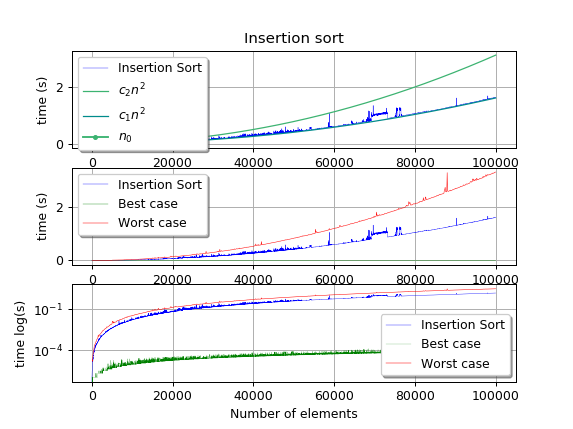

In [25]:
# Insertion sort algorithm performances
InsertionSortFig, InsertionPlt = plt.subplots(nrows=3, ncols=1)
InsertionPlt[2].semilogy(dataInsertion['Elements'], dataInsertion['Time taken'], linewidth = 0.3, color = 'blue', label = "Insertion Sort")
InsertionPlt[2].semilogy(dataBestInsertion['Elements'], dataBestInsertion['Time taken'], linewidth = 0.15, color = 'green', label = "Best case")
InsertionPlt[2].semilogy(dataWorstInsertion['Elements'], dataWorstInsertion['Time taken'], linewidth = 0.4, color = 'red', label = "Worst case")
InsertionPlt[1].plot(dataInsertion['Elements'], dataInsertion['Time taken'], linewidth = 0.3, color = 'blue', label = "Insertion Sort")
InsertionPlt[1].plot(dataBestInsertion['Elements'], dataBestInsertion['Time taken'], linewidth = 0.3, color = 'green', label = "Best case")
InsertionPlt[1].plot(dataWorstInsertion['Elements'], dataWorstInsertion['Time taken'], linewidth = 0.4, color = 'red', label = "Worst case")
InsertionPlt[0].plot(dataInsertion['Elements'], dataInsertion['Time taken'], linewidth = 0.3, color = 'blue', label = "Insertion Sort")

sqrData = (dataInsertion['Elements'])*(dataInsertion['Elements'])
c2 = 3.1e-10
n02 = 27410
c1 = 1.6e-10

InsertionPlt[0].plot(dataInsertion['Elements'], c2*sqrData, linewidth = 1, color = 'mediumseagreen', label = "$c_{2}n^2$")
InsertionPlt[0].plot(dataInsertion['Elements'], c1*sqrData, linewidth = 1, color = 'darkcyan', label = "$c_{1}n^2$")
InsertionPlt[0].plot(n02, 0, marker = 'o', color = 'mediumseagreen', ms=3,label = "$n_{0}$")

InsertionPlt[0].set(title = "Insertion sort");
InsertionPlt[0].legend(loc='upper left', frameon = True, shadow = True);
InsertionPlt[1].legend(loc='upper left', frameon = True, shadow = True);
InsertionPlt[2].legend(loc='lower right', frameon = True, shadow = True);
InsertionPlt[0].set(xlabel = 'Number of elements', ylabel = 'time (s)');
InsertionPlt[1].set(xlabel = 'Number of elements', ylabel = 'time (s)');
InsertionPlt[2].set(xlabel = 'Number of elements', ylabel = 'time log(s)');
InsertionPlt[0].grid();
InsertionPlt[1].grid();
InsertionPlt[2].grid();



Per valutare le prestazioni di Insertion Sort si è scelto di eseguire l'algoritmo in tre situazioni differenti, al fine di poter confrontarne le prestazioni nel caso migliore, medio e peggiore:

* **Array di input ordinato in senso crescente** (verde)
* **Array di input generato randomicamente** (blu)
* **Array di input ordinato in senso decrescente** (rosso)

Come è possibile ossservare dal grafico, il tempo di esecuzione di Insertion Sort non è lineare nella dimensione dell'array da ordinare nel caso di array generato randomicamente e nel caso di array ordinato in senso decrescente. Tale affermazione è invece valida per il caso migliore di array ordinato in senso crescente.

Nel grafico sono infine riportate le linee di tendenza dell'algoritmo. Sperimentalmente sono state calcolate le costanti tali per cui la definizione di $\theta(n)$ è verificata. In particolare sono stati ottenuti i seguenti risultati:

* $c_{1} = 1.6*10^{-10}$
* $c_{2} = 3.1*10^{-10}$
* $n_{0} = 27410$

Sebbene lo scopo dell'elaborato sia l'analisi delle caratteristiche temporali piuttosto che spaziali degli algoritmi di ordinamento proposti, è opportuno osservare che Insertion Sort è un algoritmo che **ordina sul posto**: la quantità di memoria necessaria per eseguire tale algoritmo, oltre all'array da ordinare, in ogni dato istante è costante: $S(n) = \theta(1)$

## Merge Sort
Di seguito è riportata l'analisi dell'algoritmo Merge Sort.

### Analisi delle prestazioni

#### Pseudocodice
>```Python
    Merge(A, p, q, r)
        n1 = q-p+1
        n2 = r-q
        create array L[1..n1] and R[1..n2]
        for i=1 to n1
            L[i] = A[i]
        for j=1 to n2
            R[i] = A[i]
        L[n1+1] = INFTY
        R[n2+1] = INFTY
        i=1
        j=1
        for k=p to r
            if L[i] <= R[j]
                A[k] = L[i]
                i = i+1
            else 
                A[k] = R[j]
                j = j+1```

>```Python
    Merge_Sort(A, p, r)
        if p < r
            q = floor((p+r)/2)
            Merge_Sort(A, p, q)
            Merge_Sort(A, q+1, r)
            Merge(A, p, q, r)
    ```


                

#### Complessità temporale
Il tempo di esecuzione di Merge Sort può essere espresso tramite una ricorrenza della forma:

$T(n) = aT\left(\frac{n}{b}\right) + D(n) + C(n)$

Dove:

* $aT\left(\frac{n}{b}\right)$ indica il tempo necessario per portare a termine il passo **Impera**. Il valore $a$ indica il numero di sottoproblemi in cui viene suddiviso il problema iniziale; il valore $b$ indica la frazione del problema originale che rappresenta il sottoproblema.
* $D(n)$ indica il tempo necessario a portare a termine il passo **Divide**.
* $C(n)$ indica il tempo necessario a portare a termine il passo **Combina**.

Nello specifico, la ricorrenza relativa a Merge Sort è la seguente:

$$ T(n) = \begin{cases}
\theta(1) & n = 1\\
T(n) = 2T\left(\frac{n}{2}\right) + \theta(1) + \theta(n) & n>1
\end{cases}$$

La soluzione di tale ricorrenza può essere trovata in diversi modi:

* Applicando il **metodo dell'esperto**
* Applicando il **metodo di sostituzione**
* Applicando il **metodo dell'albero di ricorrenza**

Per brevità la dimostrazione tramite albeo di ricorrenza è omessa.

##### Metodo dell'esperto
È possibile, innanzitutto, semplificare l'espressione della ricorrenza di Merge Sort come segue:

$$ T(n) = \begin{cases}
\theta(1) & n = 1\\
T(n) = 2T\left(\frac{n}{2}\right) + \theta(n) & n>1
\end{cases}$$

A questo punto, in accordo con quanto specificato dal metodo dell'esperto, si valuta:

$n^{\log_{b}{a}} = n^1 = n$ 

e lo si confronta con $\theta(n)$:

$n = \theta(n)$

Tale condizione rispecchia il *Caso 2* del metodo dell'esperto ed assicura che 

$T(n) = \theta(n\log{n})$

##### Metodo di sostituzione
Supponendo che la soluzione sia $O(n\log{n})$ si procede con la dimostrazione tramite il metodo di sostituzione.

##### Passo induttivo

Si vuole dimostrare che $T(n) \le dn\log{n}$ o, in altre parole, $\exists d, n_0 : 0 \le T(n) \le dn\log{n}, \forall n > n_0$ 

Supposta vera la tesi per $\frac{n}{2}$ si dimostra vera per $n$.

$T(n) = 2T\left(\frac{n}{2}\right) + \theta(n) \le 2d\frac{n}{2}\log{\left(\frac{n}{2}\right)}+ cn = dn\log{n} - dn\log{2} + cn = dn\log{n} - dn +cn$

Per dimostrare la tesi dev'essere:

$dn\log{n} - dn + cn \le dn\log{n}$

$dn\log{n} +(c-d)n \le dn\log{n}$

$(c-d)n \le 0$

$(d-c)n \ge 0$

da cui 

$d\ge c$ e $n \ge 1$

##### Passo base

Si considerino come casi base della dimostrazione induttiva $T(2)$ e $T(3)$. Dlla ricorrenza si ottiene $T(2) = 4$ e $T(3) = 5$. La dimostrazione induttiva che $T(n) \le d(n\log{n})$ può essere completata scegliendo $d$ sufficientemente grande in modo che $T(2) = 4 \le d2\log{2}$ e $T(3) = 5 \le d3\log{3}$. Per tale motivo è sufficiente scegliere $d>2$ per rendere validi entrambi i casi base.

In conclusione, la tesi è valida $\forall d \ge max\{c, 2\}$ e $\forall n \ge 1$. 

### Implementazione dell'algoritmo
Di seguito è riportato uno snippet di codice C rappresentante l'implementazione dell'algoritmo Merge Sort.

>``` c
>   void merge(vector* A, int p, int q, int r){
>
>	int n1 = q-p+1;
>	int n2 = r-q;
>
>	int* L = malloc((n1+1)*sizeof(int));
>	int* R = malloc((n2+1)*sizeof(int));
>	for(int i=0; i<n1; i++){
>		L[i] = A->v[p+i];
>	}
>	for(int j=0; j<n2; j++){
>		R[j] = A->v[q+j+1];
>	}
>	L[n1] = 100;
>	R[n2] = 100;
>
>	int i = 0, j = 0;
>	for(int k=p; k<=r; k++){
>
>		if(L[i] <= R[j]){
>			A->v[k] = L[i];
>			i++;
>		}else{
>			A->v[k] = R[j];
>			j++;
>		}
>	}
>
>	free(L);
>	free(R);
>}```

>``` c
void merge_sort(vector* A, int p, int r){
	if(p<r){
		int q = p+(r-p)/2;
		merge_sort(A,p,q);
		merge_sort(A,q+1,r);
		merge(A,p,q,r);
	}
}```

### Esecuzione dell'algoritmo
In questa sezione è riportata un'anteprima formattata del report generato al termine dell'esecuzione del programma.

In [5]:
# Reading csv files
dataMerge = pd.read_csv("MergeSort_d100k_s10_r10_rnd.txt", names=['Elements','Time taken']) 

In [6]:
df = pd.DataFrame(dataMerge.head())
df.append(dataMerge.tail())

,Elements,Time taken
0,10,0.000007
1,20,0.000011
2,30,0.000012
3,40,0.000025
4,50,0.000027
9995,99960,0.026426
9996,99970,0.027594
9997,99980,0.026021
9998,99990,0.032069
9999,100000,0.030316


### Visualizzazione dei risultati sperimentali

<IPython.core.display.Javascript object>


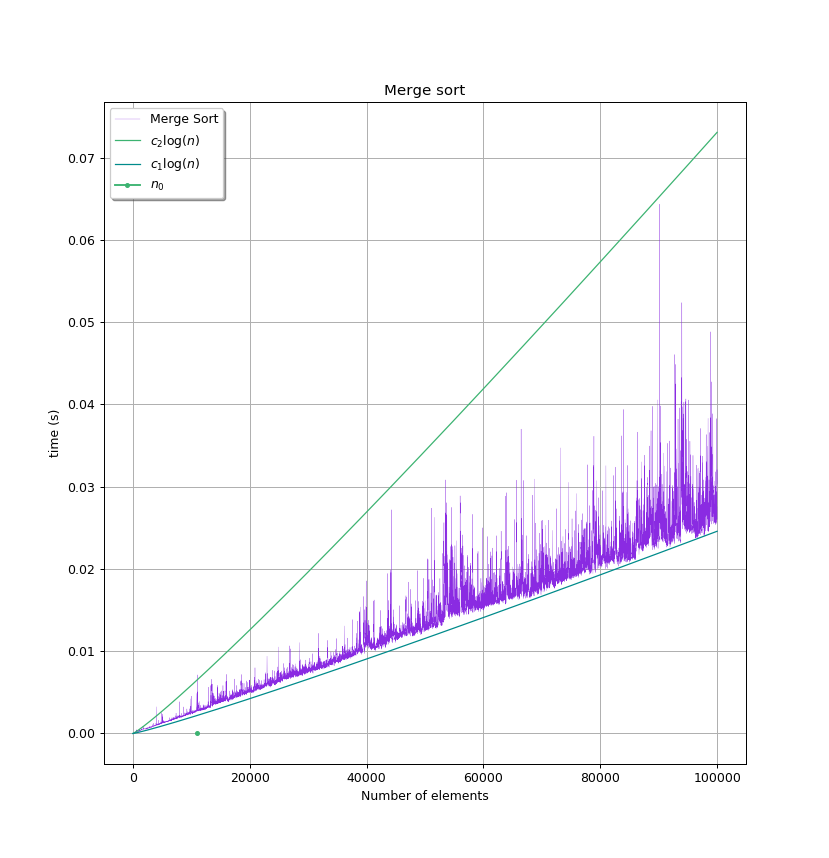

In [29]:
# Merge sort algorithm performances
MergeSortFig, MergePlt = plt.subplots();
MergePlt.plot(dataMerge['Elements'], dataMerge['Time taken'], linewidth = 0.2, color = 'blueviolet', label = "Merge Sort");
MergePlt.set(xlabel = 'Number of elements', ylabel = 'time (s)', title = 'Merge sort');


logData = dataMerge['Elements']*(np.log2(dataMerge['Elements']))

c2 = 4.4e-8
n02 = 11020
c1 = 1.48e-8

MergePlt.plot(dataMerge['Elements'], c2*logData, linewidth = 1, color = 'mediumseagreen', label = "$c_{2}\log(n)$")
MergePlt.plot(dataMerge['Elements'], c1*logData, linewidth = 1, color = 'darkcyan', label = "$c_{1}\log(n)$")
MergePlt.plot(n02, 0, marker = 'o', color = 'mediumseagreen', ms=3,label = "$n_{0}$")
MergePlt.legend(loc = 'upper left', frameon = True, shadow = True);
MergePlt.grid();

Data la natura dell'algoritmo Merge Sort non è possibile individuare un caso migliore o un caso peggiore per l'esecuzione.

Dal grafico del tempo di esecuzione è possibile osservare  che le prestazioni di Merge Sort sono nettamente migliori rispetto a quelle di Insertion sort: per l'ordinamento di un array di $10^5$ elementi si passa dall'ordine dei secondi all'ordine del centesimo di secondo.


Nel grafico sono infine riportate le linee di tendenza dell'algoritmo. Sperimentalmente sono state calcolate le costanti tali per cui la definizione di $\theta(n\log(n))$ è verificata. In particolare sono stati ottenuti i seguenti risultati:

* $c_{1} = 1.48*10^{-8}$
* $c_{2} = 4.4*10^{-8}$
* $n_{0} = 11020$

Merge Sort, a differenza di Insertion Sort, **non ordina sul posto**. La quantità di memoria necessaria per ordinare l'array, oltre quella richiesta dall'array stesso è proporzionale alla dimensione dell'input: $S(n) = \theta(n)$

## Heap Sort
Di seguito è riportata l'analisi dell'algoritmo Heap Sort.

### Analisi delle prestazioni

#### Pseudocodice

>```Python
    Max_Heapify(A, i)
        r = LEFT(i)
        l = RIGHT(i)
        largest = i
        if l <= A.heap_size and A[l] > A[i]
            largest = l
        if r <= A.heap_size and A[r] > A[i]
            largest = r
        if largest != i
            swap A[largest] with A[i]
            Max_Heapify(A, largest)```

>```Python
    Build_Max_Heap(A)
        A.heap_size = A.length
        for i = floor(A.length/2) downto 1
            Max_Heapify(A, i)
    ```

>```Python
    Heap_Sort(A)
        Build_Max_Heap(A)
        for i = A.length downto 2
            swap A[i] with A[1]
            A.heap_size = A.heap_size - 1
            Max_Heapify(A, 1)
    ```
                

#### Complessità temporale
Il tempo di esecuzione di Heap Sort dipende dal tempo di esecuzione delle procedure <span style="font-family:courier;">Max_Heapify</span>  e <span style="font-family:courier;">Build_Max_Heap</span>.

##### <span style="font-family:courier;">Max_Heapify</span>

Tale procedura è di tipo ricorsivo ed è possibile dimostrare che il tempo di esecuzione nel caso peggiore è espresso dalla ricorsione

$T(n) \le T\left(\frac{2}{3}n\right) + \theta(1)$

dove $n$ è la dimensione del sottoalbero radicato nel nodo sul quale si invoca la procedura.

A questo punto, applicando il metodo dell'esperto, si valuta:

$n^{\log_{b}{a}} = n^{\log_{\frac{3}{2}}{1}} = n^0 = 1$ 

e lo si confronta con $\theta(1)$:

$\theta(1) = \theta(1)$

Tale condizione rispecchia il *Caso 2* del metodo dell'esperto ed assicura che 

$T(n) = \theta(\log{n})$

##### <span style="font-family:courier;">Build_Max_Heap</span>

Il tempo di esecuzione di <span style="font-family:courier;">Build_Max_Heap</span> dipende dal tempo di esecuzione della procedura <span style="font-family:courier;">Max_Heapify</span>. 

Il ciclo <span style="font-family:courier;">for</span> nella procedura <span style="font-family:courier;">Build_Max_Heap</span> viene eseguito un numero di volte proporzionale al numero di elmenti dell'array da riordinare. In particolare, sapendo che un heap di $n$ elementi è possibile visualizzarlo come un albero binario e che la sua altezza è pari a $\lfloor\log(n)\rfloor$, si ha:

$T(n) = \sum_{h=0}^{\lfloor\log(n)\rfloor} \left\lceil \frac{n}{2^{h+1}} \right\rceil O(h)$

Ovvero, il tempo di esecuzione è dato dalla somma sul numero di livelli dell'heap del prodotto fra il numero di nodi per livello dell'heap ed il tempo di esecuzione della procedura <span style="font-family:courier;">Max_Heapify</span> espressa in funzione dell'altezza dell'heap sulla quale viene invocata.

Sviluppando la sommatoria si ottiene:

$T(n) = O\left(\sum_{h=0}^{\lfloor\log(n)\rfloor} \frac{hn}{2^{h+1}}\right)$
$= O\left(\frac{n}{2}\sum_{h=0}^{\lfloor\log(n)\rfloor} \frac{h}{2^{h}}\right)$
$= O\left(\frac{n}{2}\sum_{h=0}^{\infty} \frac{h}{2^{h}}\right)$
$= O\left(\frac{2n}{2}\right) = O(n)$

##### <span style="font-family:courier;">Heap_Sort</span>

Valutati i tempi di esecuzione delle procedure chiamate da  <span style="font-family:courier;">Heap_Sort</span> è facile calcolare il suo tempo di esecuzione come la somma fra il tempo di esecuzione della procedura <span style="font-family:courier;">Build_Max_Heap</span> ed $(n-1)$ volte il tempo di esecuzione della procedura <span style="font-family:courier;">Max_Heapify</span>: 

$T(n) = O((n-1)\log(n)) + O(n) = O(n\log(n))$

### Implementazione dell'algoritmo
Di seguito è riportato uno snippet di codice C rappresentante l'implementazione dell'algoritmo Heap Sort.

>```c
>void max_heapify(heap* heap, int idx){
>	int l = LEFT(idx);
>	int r = RIGHT(idx);
>	int max = idx;
>
>	if(l < heap->dim_heap && heap->v[idx] < heap->v[l])
>		max = l;
>	if(r < heap->dim_heap && heap->v[max] < heap->v[r])
>		max = r;
>	if(max != idx){
>		swap(heap, idx, max);
>		max_heapify(heap, max);
>	}
>}```

>```c
>void build_max_heap(heap* heap){
>	heap->dim_heap = heap->dim;
>
>	for(int i= (heap->dim_heap -1)/2; i>=0; i--){
>		max_heapify(heap, i);
>	}
>}```

>```c
>void heap_sort(heap* heap){
>	build_max_heap(heap);
>
>	for(int i=heap->dim-1; i>0; i--){
>		swap(heap, 0, i);
>		heap->dim_heap--;
>		max_heapify(heap, 0);
>	}
>}```

Dove gli indici dei figli e del padre di un nodo sono definiti come segue

>```c
>#define LEFT(i) (i*2 + 1);
>#define RIGHT(i) (i*2 + 2);
>#define PARENT(i) (i/2);```

Mentre il tipo heap 

>```c
>typedef struct {
>	int* v;
>	int dim;
>	int dim_heap;
>}heap;```

### Esecuzione dell'algoritmo
In questa sezione è riportata un'anteprima formattata del report generato al termine dell'esecuzione del programma.

In [8]:
# Reading csv files
dataHeap = pd.read_csv("HeapSort_d100k_s10_r10_rnd.txt", names=['Elements','Time taken']) 
dataBestHeap = pd.read_csv("HeapSort_d100k_s10_r10_revsrt.txt", names=['Elements','Time taken'])
dataWorstHeap = pd.read_csv("HeapSort_d100k_s10_r10_srt.txt", names=['Elements','Time taken'])

In [9]:
df = pd.DataFrame(dataHeap.head())
df.append(dataHeap.tail())

,Elements,Time taken
0,10,0.000001
1,20,0.000001
2,30,0.000002
3,40,0.000003
4,50,0.000004
9995,99960,0.011527
9996,99970,0.011994
9997,99980,0.011829
9998,99990,0.011459
9999,100000,0.011331


### Visualizzazione dei risultati sperimentali

<IPython.core.display.Javascript object>


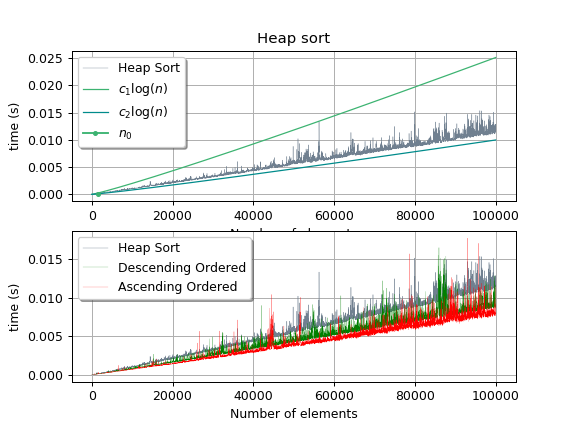

In [33]:
# Heapsort algorithm performances
HeapSortFig, HeapPlt = plt.subplots(nrows=2, ncols=1)
HeapPlt[0].plot(dataHeap['Elements'], dataHeap['Time taken'], linewidth = 0.3, color = 'slategray', label = "Heap Sort")
HeapPlt[1].plot(dataHeap['Elements'], dataHeap['Time taken'], linewidth = 0.3, color = 'slategray', label = "Heap Sort")
HeapPlt[1].plot(dataBestHeap['Elements'], dataBestHeap['Time taken'], linewidth = 0.15, color = 'green', label = "Descending Ordered")
HeapPlt[1].plot(dataWorstHeap['Elements'], dataWorstHeap['Time taken'], linewidth = 0.15, color = 'red', label = "Ascending Ordered")

logData = dataHeap['Elements']*(np.log2(dataHeap['Elements']))

c2 = 15.1e-9
n02 = 1490
c1 = 6e-9

HeapPlt[0].plot(dataHeap['Elements'], c2*logData, linewidth = 1, color = 'mediumseagreen', label = "$c_{1}\log(n)$")
HeapPlt[0].plot(dataHeap['Elements'], c1*logData, linewidth = 1, color = 'darkcyan', label = "$c_{2}\log(n)$")
HeapPlt[0].plot(n02, 0, marker = 'o', color = 'mediumseagreen', ms=3,label = "$n_{0}$")

HeapPlt[0].set(xlabel = 'Number of elements', ylabel = 'time (s)', title = 'Heap sort');
HeapPlt[1].set(xlabel = 'Number of elements', ylabel = 'time (s)');
HeapPlt[0].legend(loc='upper left', frameon = True, shadow = True);
HeapPlt[1].legend(loc='upper left', frameon = True, shadow = True);
HeapPlt[0].grid();
HeapPlt[1].grid();

Per valutare le prestazioni di Heap Sort si è scelto di eseguire l'algoritmo in tre situazioni differenti, al fine di poter confrontarne le prestazioni nei tre casi:

* **Array di input ordinato in senso decrescente** (verde)
* **Array di input generato randomicamente** (grigio)
* **Array di input ordinato in senso crescente** (rosso)

Nel grafico sono riportate le linee di tendenza dell'algoritmo. Sperimentalmente sono state calcolate le costanti tali per cui la definizione di $\theta(n\log(n))$ è verificata. In particolare sono stati ottenuti i seguenti risultati:

* $c_{1} = 6.0*10^{-9}$
* $c_{2} = 15.1*10^{-9}$
* $n_{0} = 1490$

Come è possibile ossservare dal grafico, il tempo di esecuzione di Heap Sort varia a seconda dei casi. 
Dal grafico dei tempi di esecuzione è possibile dedurre che il tempo di esecuzione nel caso di array di input ordinato in maniera decrescente è maggiore rispetto al caso di array ordinato in senso crescente. 

Ciò potrebbe risultare strano in quanto un array ordinato in maniera decrescente rappresenta già un Max Heap. Di conseguenza, osservando la procedura <span style="font-family:courier;">Max_Heapify</span> invocata dalla <span style="font-family:courier;">Build_Max_Heap</span>, si nota che in questo caso si ha il minor numero di chiamate ricorsive possibili della <span style="font-family:courier;">Max_Heapify</span>. Questo quindi risulterebbe in un minor tempo di esecuzione a scapito del caso di array di input ordinato in maniera crescente.

Fermo restando che l'affermazione precedente risulta vera, è anche vero che nel caso di array ordinato in senso crescente, si ottiene un tempo di esecuzione migliore. 
Questo è causato dal fatto che mentre nel caso di array ordinato in senso decrescente si effettuano meno chiamate della <span style="font-family:courier;">Max_Heapify</span> all'interno della procedura <span style="font-family:courier;">Build_Max_Heap</span>, se ne effuttuano molte di più durante l'esecuzione della procedura <span style="font-family:courier;">Heap_Sort</span>.
Viceversa, nel caso di array ordinato in senso decrescente, si effettua un maggior numero di invocazioni della <span style="font-family:courier;">Max_Heapify</span> all'interno della procedura <span style="font-family:courier;">Build_Max_Heap</span>, le quali sono però abbondantemente compensate dal numero di invocazioni della stessa nella procedura <span style="font-family:courier;">Heap_Sort</span>.

Heap Sort è un algoritmo che **ordina sul posto**: la quantità di memoria necessaria per eseguire tale algoritmo, oltre all'array da ordinare, in ogni dato istante è costante: $S(n) = \theta(1)$

## Quick Sort
Di seguito è riportata l'analisi dell'algoritmo Quick Sort.

### Analisi delle prestazioni

#### Pseudocodice
>```Python
    Partition(A, p, r)
        pivot = A[r]
        i = p-1
        for j=p to r-1
            if A[j] <= pivot
            i = i+1
            swap A[i] with A[j]
        swap A[i+1] with A[r]
        return i+1```

>```Python
    Quick_Sort(A, p, r)
        if P < r
            q = partition(A, p, r)
            Quick_Sort(A, p, q-1)
            Quick_Sort(A, q+1, r)```         

#### Complessità temporale
Il tempo di esecuzione di Quick Sort dipende dal tempo di esecuzione delle procedure <span style="font-family:courier;">Partition</span>  e <span style="font-family:courier;">Quick_Sort</span>.

##### <span style="font-family:courier;">Partition</span>
Il tempo di esecuzione della procedura <span style="font-family:courier;">Partition</span> è proporzionale al numero di elementi dell'array sul quale essa viene invocata. In particolare, si ha: 

$T(n) = \Theta\left(n\right)$

dove $n$ è il numero di elementi su cui opera, ovvero $r-p+1$.

##### <span style="font-family:courier;">Quick_Sort</span>
Il tempo di esecuzione della procedura <span style="font-family:courier;">Quick_Sort</span> può essere espresso tramite una ricorrenza, la quale può a sua volta essere particolarizzata per la specifica situazione di esecuzione. In particolare, si considerano i seguenti casi:

* **worst case partitioning**
* **best case partitioning**
* **balanced partitioning**

La complessità temporale di Quick Sort dipende infatti da come la routine  <span style="font-family:courier;">Partition</span> suddivide l'array in ingresso ad ogni chiamata ricorsiva.

###### Best case partitioning
Il caso migliore si ha quando il partizionamento fornito dalla procedura  <span style="font-family:courier;">Partition</span> restituisce due sottosequenze di egual dimensione. In tal caso, è possibile esprimere il tempo di esecuzione di Quick Sort tramite la ricorrenza:

$T(n) \le 2T\left(\frac{n}{2}\right) + \theta(n)$

Applicando il metodo dell'esperto si ricava immediatamente che:

$T(n) = \theta(nlog(n))$

###### Worst case partitioning
Il caso peggiore si ha quando il partizionamento fornito dalla procedura  <span style="font-family:courier;">Partition</span> restituisce una sottosequenza di dimensione n-1. In tal caso, è possibile esprimere il tempo di esecuzione di Quick Sort tramite la ricorrenza:

$T(n) = T(n-1) + \theta(n)$

Applicando il metodo di sostituzione si dimostra che $T(n) = \Theta(n^2)$:

$T(n) \le c(n-1)^2 + \Theta(n) \le$

$\le c(n-1)^2 + dn =$

$= cn^2 +c - 2cn +dn \le cn^2$

Supponendo $n > \frac{1}{2}$ si ha:

$c \ge \frac{dn}{2n - 1}$

###### Balanced partitioning
É possibile dimostrare, sfruttando un albero di ricorrenza, che nel caso di partizionamento sbilanciato il tempo di esecuzione è ancora pari a $T(n) = \Theta(nlog(n))$. Ovviamente, i fattori moltiplicativi nascosti nella notazione asintotica saranno maggiori rispetto al caso di best case partitioning.

### Implementazione dell'algoritmo
Di seguito è riportato uno snippet di codice C rappresentante l'implementazione dell'algoritmo Quick Sort.

>``` c
>int partition(vector* vector, int p, int r){
>	int pivot = vector->v[r];
>
>	int i = p-1;
>	for(int j = p; j<r; j++){
>		if(vector->v[j] < pivot){
>			i++;
>			swap(vector, i, j);
>		}
>	}
>
>	swap(vector, i+1, r);
>	return i+1;
>}```


>``` c
>void quick_sort(vector* v, int p, int r){
>
>	if(p<r){
>		int q = partition(v, p, r);
>		quick_sort(v, p, q-1);
>		quick_sort(v, q+1, r);
>	}
>}```

### Esecuzione dell'algoritmo
In questa sezione è riportata un'anteprima formattata del report generato al termine dell'esecuzione del programma.

In [11]:
# Reading csv files
dataQuick = pd.read_csv("QuickSort_d100k_s10_r10_rnd.txt", names=['Elements','Time taken'])
dataWorstQuick = pd.read_csv("QuickSort_d100k_s100_r3_srt.txt", names=['Elements','Time taken'])

In [12]:
df = pd.DataFrame(dataQuick.head())
df.append(dataQuick.tail())

,Elements,Time taken
0,10,0.000000
1,20,0.000001
2,30,0.000001
3,40,0.000002
4,50,0.000002
9995,99960,0.069330
9996,99970,0.063757
9997,99980,0.063557
9998,99990,0.063196
9999,100000,0.063807


### Visualizzazione dei risultati sperimentali

<IPython.core.display.Javascript object>


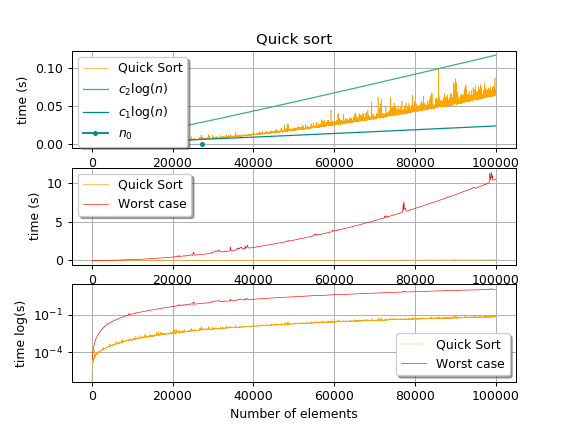

In [35]:
# Quicksort algorithm performances
QuickSortFig, QuickPlt = plt.subplots(nrows=3, ncols=1)
QuickPlt[0].plot(dataQuick['Elements'], dataQuick['Time taken'], linewidth = 0.5, color = 'orange', label = "Quick Sort")
QuickPlt[1].plot(dataQuick['Elements'], dataQuick['Time taken'], linewidth = 0.5, color = 'orange', label = "Quick Sort")
QuickPlt[1].plot(dataWorstQuick['Elements'], dataWorstQuick['Time taken'], linewidth = 0.5, color = 'red', label = "Worst case")
QuickPlt[2].semilogy(dataQuick['Elements'], dataQuick['Time taken'], linewidth = 0.3, color = 'orange', label = "Quick Sort")
QuickPlt[2].semilogy(dataWorstQuick['Elements'], dataWorstQuick['Time taken'], linewidth = 0.5, color = 'red', label = "Worst case")

logData = dataQuick['Elements']*(np.log2(dataQuick['Elements']))

c2 = 7e-8
c1 = 1.4e-8
n01 = 27170

QuickPlt[0].plot(dataQuick['Elements'], c2*logData, linewidth = 1, color = 'mediumseagreen', label = "$c_{2}\log(n)$")
QuickPlt[0].plot(dataQuick['Elements'], c1*logData, linewidth = 1, color = 'darkcyan', label = "$c_{1}\log(n)$")
QuickPlt[0].plot(n01, 0, marker = 'o', color = 'darkcyan', ms=3, label = "$n_{0}$")

QuickPlt[0].set(xlabel = 'Number of elements', ylabel = 'time (s)', title = 'Quick sort');
QuickPlt[1].set(xlabel = 'Number of elements', ylabel = 'time (s)');
QuickPlt[2].set(xlabel = 'Number of elements', ylabel = 'time log(s)');
QuickPlt[0].legend(loc='upper left', frameon = True, shadow = True);
QuickPlt[1].legend(loc='upper left', frameon = True, shadow = True);
QuickPlt[2].legend(loc='lower right', frameon = True, shadow = True);
QuickPlt[0].grid();
QuickPlt[1].grid();
QuickPlt[2].grid();

Per valutare le prestazioni di Quick Sort si è scelto di eseguire l'algoritmo in due situazioni differenti, al fine di poter confrontarne le prestazioni nel caso medio e peggiore:

* **Array di input generato randomicamente** (blu)
* **Array di input ordinato in senso crescente** (rosso)

Come è possibile ossservare dal grafico, il tempo di esecuzione di Quick Sort nel caso di partizionamento sbilanciato è di tipo quadratico.

Nel grafico sono infine riportate le linee di tendenza dell'algoritmo. Sperimentalmente sono state calcolate le costanti tali per cui la definizione di $\theta(n\log(n))$ è verificata. In particolare sono stati ottenuti i seguenti risultati:

* $c_{1} = 7.0*10^{-8}$
* $c_{2} = 1.4*10^{-8}$
* $n_{0} = 27170$

Quick Sort è un algoritmo che **ordina sul posto**: la quantità di memoria necessaria per eseguire tale algoritmo, oltre all'array da ordinare, in ogni dato istante è costante: $S(n) = \theta(1)$

### Insertion Sort e Quick Sort
Di seguito sono comparati i tempi di esecuzione nel caso peggiore per entrambi gli algoritmi.

<IPython.core.display.Javascript object>


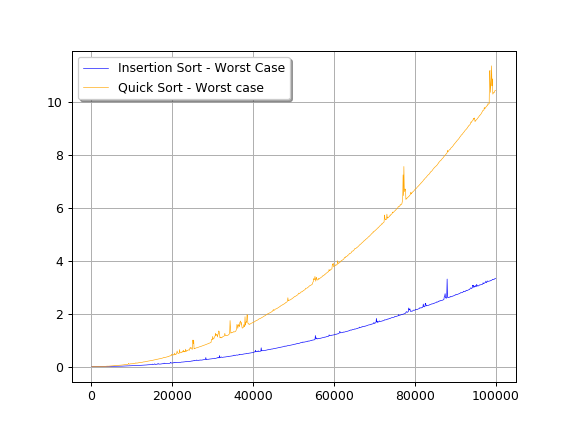

In [14]:
QuickInsertionSortFig, QuickInsertionPlt = plt.subplots()
QuickInsertionPlt.plot(dataWorstInsertion['Elements'], dataWorstInsertion['Time taken'], linewidth = 0.5, color = 'blue', label = "Insertion Sort - Worst Case")
QuickInsertionPlt.plot(dataWorstQuick['Elements'], dataWorstQuick['Time taken'], linewidth = 0.5, color = 'orange', label = "Quick Sort - Worst case")
QuickInsertionPlt.legend(loc='upper left', frameon = True, shadow = True);
QuickInsertionPlt.grid();

Come è possibile osservare dal grafico, sebbene i due algoritmi nel caso peggiore abbiano la stessa complessità asintotica, i fattori costanti nascosti nell'espressione asintotica del tempo di esecuzione di Quick Sort sono maggiori rispetto a quelli di Insertion Sort. 

Inoltre, va osservato che Insertion Sort è un algoritmo **iterativo**, mentre Quick Sort è **ricorsivo**. In generale, gli algoritmi ricorsivi presentano prestazioni inferiori rispetto alle loro versioni iterative, le quali infatti non necessitano di alcuna chiamata a procedura, la quale implica la costruzione di un nuovo record di attivazione ad ogni invocazione.

## Paragone degli algoritmi di ordinamento basati su confronti
Di seguito sono riportati alcuni grafici rissuntivi delle prestazioni dei quattro gli algoritmi di ordinamento basati su confronti.

### Analisi asintotica

<IPython.core.display.Javascript object>


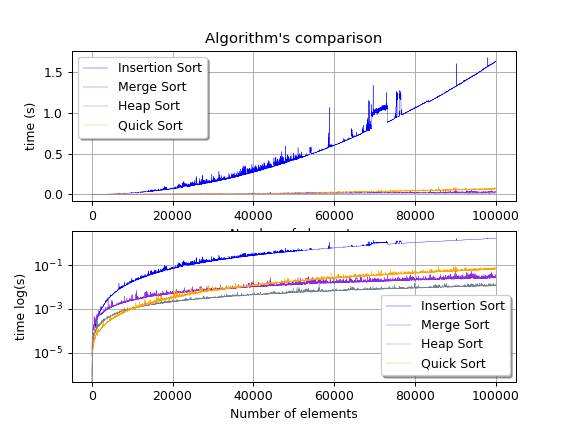

In [15]:
# Algorithm's comparison
CmpFig, CmpPlt = plt.subplots(nrows=2, ncols=1)
CmpPlt[1].semilogy(dataInsertion['Elements'], dataInsertion['Time taken'], linewidth = 0.3, color = 'blue', label = "Insertion Sort")
CmpPlt[1].semilogy(dataMerge['Elements'], dataMerge['Time taken'], linewidth = 0.3, color = 'blueviolet',  label = "Merge Sort")
CmpPlt[1].semilogy(dataHeap['Elements'], dataHeap['Time taken'], linewidth = 0.3, color = 'slategray', label = "Heap Sort")
CmpPlt[1].semilogy(dataQuick['Elements'], dataQuick['Time taken'], linewidth = 0.3, color = 'orange', label = "Quick Sort")
CmpPlt[0].plot(dataInsertion['Elements'], dataInsertion['Time taken'], linewidth = 0.3, color = 'blue', label = "Insertion Sort")
CmpPlt[0].plot(dataMerge['Elements'], dataMerge['Time taken'], linewidth = 0.3, color = 'blueviolet',  label = "Merge Sort")
CmpPlt[0].plot(dataHeap['Elements'], dataHeap['Time taken'], linewidth = 0.3, color = 'slategray', label = "Heap Sort")
CmpPlt[0].plot(dataQuick['Elements'], dataQuick['Time taken'], linewidth = 0.3, color = 'orange', label = "Quick Sort")
CmpPlt[0].set(title = "Algorithm's comparison");
CmpPlt[0].legend(loc ='upper left', frameon = True, shadow = True);
CmpPlt[0].set(xlabel = 'Number of elements', ylabel = 'time (s)');
CmpPlt[1].set(xlabel = 'Number of elements', ylabel = 'time log(s)');
CmpPlt[1].legend(loc ='lower right', frameon = True, shadow = True);
CmpPlt[0].grid();
CmpPlt[1].grid();

Asintoticamente le migliori prestazioni sono offerte, in ordine, da:

1. Heap Sort
2. Merge Sort
3. Quick Sort
4. Insertion Sort

### Analisi puntuale

<IPython.core.display.Javascript object>


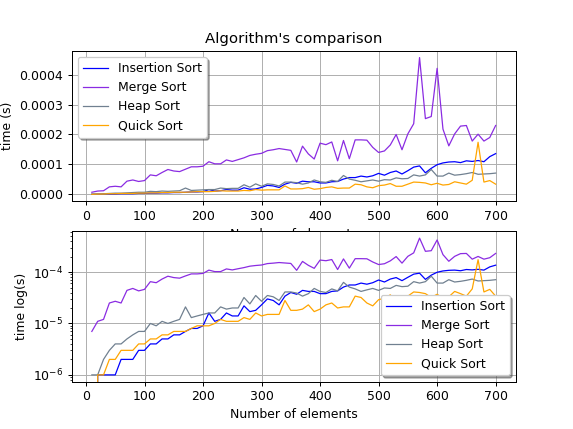

In [16]:
dataInsertion1 = dataInsertion.iloc[0:70]
dataMerge1 = dataMerge.iloc[0:70]
dataHeap1 = dataHeap.iloc[0:70]
dataQuick1 = dataQuick.iloc[0:70]


CmpFig1, CmpPlt1 = plt.subplots(nrows=2, ncols=1)
CmpPlt1[1].semilogy(dataInsertion1['Elements'], dataInsertion1['Time taken'], linewidth = 1, color = 'blue', label = "Insertion Sort")
CmpPlt1[1].semilogy(dataMerge1['Elements'], dataMerge1['Time taken'], linewidth = 1, color = 'blueviolet',  label = "Merge Sort")
CmpPlt1[1].semilogy(dataHeap1['Elements'], dataHeap1['Time taken'], linewidth = 1, color = 'slategray', label = "Heap Sort")
CmpPlt1[1].semilogy(dataQuick1['Elements'], dataQuick1['Time taken'], linewidth = 1, color = 'orange', label = "Quick Sort")
CmpPlt1[0].plot(dataInsertion1['Elements'], dataInsertion1['Time taken'], linewidth = 1, color = 'blue', label = "Insertion Sort")
CmpPlt1[0].plot(dataMerge1['Elements'], dataMerge1['Time taken'], linewidth = 1, color = 'blueviolet',  label = "Merge Sort")
CmpPlt1[0].plot(dataHeap1['Elements'], dataHeap1['Time taken'], linewidth = 1, color = 'slategray', label = "Heap Sort")
CmpPlt1[0].plot(dataQuick1['Elements'], dataQuick1['Time taken'], linewidth = 1, color = 'orange', label = "Quick Sort")
CmpPlt1[0].set(title = "Algorithm's comparison");
CmpPlt1[0].legend(loc ='upper left', frameon = True, shadow = True);
CmpPlt1[0].set(xlabel = 'Number of elements', ylabel = 'time (s)');
CmpPlt1[1].set(xlabel = 'Number of elements', ylabel = 'time log(s)');
CmpPlt1[1].legend(loc ='lower right', frameon = True, shadow = True);
CmpPlt1[0].grid();
CmpPlt1[1].grid();

Sebbene la classifica delle prestazioni asintotiche veda Insertion Sort all'ultimo posto, tale algoritmo si dimostra particolarmente performante per dimensioni degli ingressi ridotte.

In particolare, in una analisi puntuale svolta su array di dimensioni inferiori di $200$ elementi, le migliori prestazioni sono offerte, in ordine, da:

1. Insertion Sort
2. Quick Sort
3. Heap Sort
4. Merge Sort